# Modelo lineal ajustado manualmente

## ¿Qué significa un modelo lineal?

El modelo lineal más simple siempre tiene esta forma:

$$
y = mx + b
$$

donde $y$ es el **resultado**, $x$ son los **valores de entrada**, $m$ es **la pendiente de la recta** y $b$ es el **intercepto**.

En otras palabras, $y$ será la **predicción**, y $x$ será el **valor de entrada**.

$m$ sera que tanto crece $y$ con respecto a $x$.

<p align="center">
  <img src="images/figura 1.png" width="500">
</p>

<p align="center">
  <b>Figura 1.</b> Pendiente en una recta.
</p>

Analiza la *Figura 1*. La pendiente  nos indica qué tanto crece $x$ con respecto a $y$.

El eje $x$ corresponde al eje horizontal de la gráfica, mientras que el eje $y$ corresponde al eje vertical.

Por ahora, deduciremos la pendiente de forma intuitiva. Para ello, tomaremos cualquier intervalo de $x$ que tenga exactamente una longitud de 1 y observaremos cuánto crece $y$ en ese mismo intervalo.

Tomemos el intervalo de $x=0$ a $x=1$, es decir, el intervalo $[0,1]$.

Cuando $x=0$, el valor de $y=0$. Cuando $x=1$, el valor de $y=2$. Esto significa que por cada unidad que aumenta $x$, el valor de $y$ aumenta el doble.

Por lo tanto, la pendiente de la Figura 1 es:

$$
m=2
$$

Ahora analicemos el término independiente del modelo.

El parámetro $b$ representa el valor en el que la recta corta al eje $y$, es decir, el valor que toma la función cuando $x=0$. Observa que $x=0$ corresponde exactamente al punto donde la gráfica intercepta el eje vertical.

Inicialmente lo haremos de forma intuitiva. Vuelve a observar la *Figura 1* y responde la siguiente pregunta:

> Cuando $x=0$, ¿cuál es el valor de  $y$?

De manera equivalente, esto también puede formularse como:

> ¿En qué valor de $y$ la recta corta al eje $x$?


Analizando la *Figura 1*, se deduce que el valor que cumple esta condición es:

$$
b=0
$$

No te preocupes: más adelante veremos una forma de **generalizar estos resultados** mediante una expresión matemática cuando tengamos dos puntos.

Como notarás, en nuestro modelo solo tenemos **un valor de entrada**. Podemos tener más valores de entrada, pero para eso necesitaríamos **más dimensiones**. Por ejemplo, para dos valores de entrada podríamos usar un **plano en tres dimensiones**.

<hr>

## Ejemplo sencillo con una sola variable

Hasta ahora hemos trabajado con modelos lineales desde un punto de vista matemático. La conexión con *Machine Learning* es directa: los modelos lineales son los modelos más simples dentro del *ML*.

A este tipo de modelos los llamaremos *Regresión Lineal*. Más adelante estudiaremos con detalle las matemáticas que hay detrás de ellos, pero antes es importante ver un ejemplo sencillo donde podamos aplicar todo lo que hemos aprendido hasta ahora.

Imagina que quieres programar un modelo de *machine learning* capaz de convertir **grados Celsius a Fahrenheit**. Para ello, experimentalmente, usas dos termómetros: uno que mide en grados *Celsius* y otro que mide en *Fahrenheit*, y registras sus valores correspondientes.

Supongamos que tus termómetros son *100 % precisos*. Esta suposición es importante porque nos permite asumir que los datos que estamos usando no contienen error. En ese caso, la relación entre grados Celsius y Fahrenheit es *perfectamente lineal* y basta con muy pocos ejemplos para obtener un modelo exacto.

Si los termómetros no fueran precisos, cada medición tendría un pequeño error. Esto haría que los puntos no cayeran exactamente sobre una recta, sino que quedaran dispersos alrededor de ella. En ese escenario, necesitaríamos muchos más ejemplos para que el modelo pudiera identificar la tendencia general y no verse afectado por errores individuales.

En otras palabras, cuantos más datos tengamos, mejor podrá el modelo distinguir la relación real entre las variables del ruido presente en las mediciones.

Cuando recolectas los datos, creas una tabla y obtienes los siguientes resultados:

| Grados | Fahrenheit |
| :----: | ---------: |
|    5   |         41 |
|   10   |         50 |

<hr>

Para ajustarlo manualmente, vamos a seguir los siguientes pasos:

### 1. Graficar los puntos

Para graficar los puntos usaremos [Matplotlib](https://matplotlib.org/), una biblioteca de Python ampliamente utilizada para la visualización de datos.

In [57]:
%%capture --no-display

# Instalaremos todo lo necesario para trabajar con matplotlib
%pip install matplotlib
%pip install numpy

In [58]:
import matplotlib.pyplot as plt
import numpy as np

[(0.0, 15.0), (0.0, 55.0)]

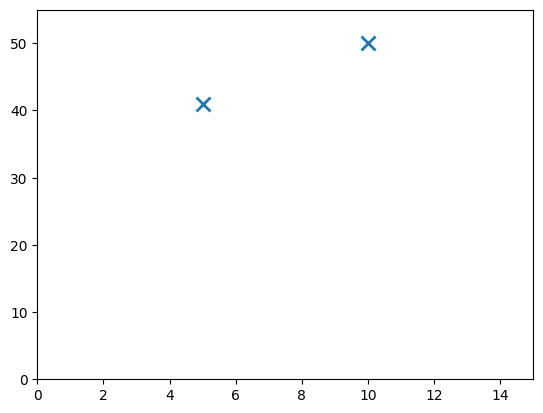

In [59]:
# valores tomados
x = [5, 10]
y = [41, 50]

fig, ax = plt.subplots()
ax.plot(x, y, "x", markeredgewidth=2, markersize=10)

ax.set(xlim=(0, 15), ylim=(0, 55))

### 2. Buscar los mejores parametros para unir los puntos

Ya sabemos que el modelo lineal de una dimensión tiene la forma:

$$
y=mx+b
$$

Nuestra tarea ahora será encontrar los mejores valores para $y$. Pero, ¿qué significa que estos valores sean buenos?

Tener buenos valores para los parámetros de un modelo lineal no significa que la recta pase exactamente por todos los puntos, sino que minimice el error global del modelo. Es decir, buscamos una recta que, en conjunto, se acerque lo más posible a todos los datos, aunque no coincida exactamente con cada uno de ellos.

En términos más formales, un buen modelo es aquel que reduce al máximo la diferencia entre los valores reales y las predicciones, considerando todos los puntos al mismo tiempo. Esta idea es fundamental en machine learning: no optimizamos punto por punto, sino el *comportamiento general del modelo*.

En el caso particular de la conversión entre grados Celsius y Fahrenheit, la relación entre ambas variables es perfectamente lineal. Esto implica que todos los puntos caen exactamente sobre una misma recta. Por esta razón, obtenemos un modelo ideal, con 0 % de error, donde las predicciones coinciden exactamente con los valores reales.

Cuando los datos son perfectos, como en este ejemplo (todas las mediciones tienen 0 % de error), basta con muy pocos puntos para determinar el modelo completo. En ese escenario, podemos calcular directamente la pendiente usando una expresión matemática simple, ya que no existe ambigüedad ni ruido en los datos.

Sin embargo, en la mayoría de situaciones reales los datos no son perfectos. 

<p align="center">
  <img src="images/figura 2.png" width="500">
</p>

<p align="center">
  <b>Figura 2.</b> Ejemplo de regresion con error: los puntos no se ajustan perfectamente a una recta.
</p>

En la *Figura 2* se muestra un caso más realista: los puntos no se ajustan exactamente a una recta, sino que quedan dispersos alrededor de ella. Esto puede deberse a errores de medición, variabilidad natural del fenómeno o factores no considerados en el modelo.

En este contexto, no existe una recta que pase por todos los puntos, y cualquier modelo lineal tendrá inevitablemente un cierto porcentaje de error. El objetivo del machine learning ya no es encontrar una recta perfecta, sino aquella que mejor represente la tendencia general de los datos, ignorando el ruido individual de cada medición.

Justamente por esta razón, cuando los datos no son exactos, necesitamos muchos más ejemplos: cuantos más puntos tengamos, mejor podrá el modelo distinguir la relación real entre las variables del ruido presente en los datos.

Cuando los datos son perfectos, como en este ejemplo, podemos calcular la pendiente usando la siguiente expresión (Si con la explicación de arriba todavía no se te hace del todo clara la idea, vale la pena que investigues un poco por tu cuenta y le des otra mirada; a veces verlo desde otro enfoque hace que todo encaje.):

$$
m = \frac{y_2 - y_1}{x_2 - x_1}
$$

La expresión con la que describimos el modelo lineal también puede escribirse de la siguiente forma:

$$
y = m(x-x_0) + y_0
$$

donde el término independiente $b$ está dado por:

$$
b=y_0 + m x_0
$$

Ahora que tenemos claras las expresiones matemáticas, llevemos todo esto a la práctica.
Hagámoslo en Python.

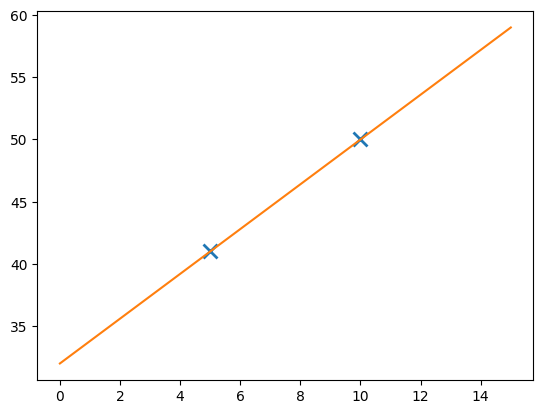

1.8 32.0


In [60]:
x = [5, 10]
y = [41, 50]

fig, ax = plt.subplots()
ax.plot(x, y, "x", markeredgewidth=2, markersize=10)

# calcular la pendiente (m) y la intersección (b)
m = (y[1] - y[0]) / (x[1] - x[0])
b = y[0] - m * x[0]

x = np.linspace(0, 15, 100)
y = m * x + b

ax.plot(x, y)
plt.show()

print(m, b)

### 3. Predecir

Ya hemos construido un modelo lineal muy básico, pero ahora surge una pregunta fundamental! ¿realmente funciona?

Comprobémoslo.

Como ya hemos dicho, $y$ representa el valor esperado, es decir, la predicción, y $x$ es nuestro valor de entrada. Por lo tanto, la expresión matemática de nuestro modelo puede traducirse a algo más concreto, como:

$$
gradosFahrenheit = m⋅{gradosCelsius} + b
$$

Si ahora reemplazamos por los valores reales obtenidos para nuestro modelo, resulta:

$$
gradosFahrenheit = 1.8⋅{gradosCelsius} + 32
$$

Con esta expresión ya podemos empezar a predecir temperaturas en Fahrenheit a partir de valores dados en grados Celsius.

In [61]:
# grado celsius
celsius = 100
# grado fahrenheit
fahrenheit = m * celsius + b

fahrenheit

212.0

### Advertencias
Este ejemplo es muy sencillo. En el mundo real, muy pocas cosas se comportan tan bien como para poder trazar una línea recta perfecta.

Existen modelos lineales en muchas más dimensiones. Por ejemplo, en tres dimensiones, a los modelos lineales los llamamos planos (un plano es un caso particular de un hiperplano). Sin embargo, la idea de fondo es exactamente la misma. Basta con comparar la expresión lineal anterior con una expresión lineal en tres dimensiones (en este caso un hiperplano):

$$
ax + by + cz = d
$$

Ahora bien, surge una pregunta razonable: ¿por qué usamos modelos lineales de más dimensiones si este modelo es mucho más simple?

La respuesta es sencilla: a veces *necesitamos más pistas* para poder predecir un resultado.

Piénsalo así: en el modelo de conversión de grados Celsius a Fahrenheit solo necesitábamos una pista, los grados Celsius.

Pero considera un caso mucho más complejo, como la felicidad de una persona. ¿Cuántas pistas necesitarías? ¿Podrías determinar si una persona es feliz con solo conocer su edad? Claramente no. Harían falta muchas variables: su edad, sus ingresos, la ciudad en la que vive, su estado familiar, entre otras.

(Estamos asumiendo, solo como ejemplo, que la felicidad se puede modelar de forma lineal, lo cual no necesariamente es cierto).

Antes de enfrentarnos a modelos con más variables, veamos un ejemplo de un modelo lineal en el que los puntos no están perfectamente alineados con una recta.

Intentemos correlacionar la felicidad con el dinero.

La pregunta clave es: ¿el dinero hace felices a las personas?

Podemos empezar importando un conjunto de datos que reúne, para distintos países, dos variables clave:
el GDP per cápita y su puntuación de "felicidad".

In [62]:
import os
import pandas as pd

In [63]:
# obtener los datos de un archivo CSV
data_root = os.getcwd()
csv_path = os.path.join(data_root, "..", "data/lifesat/lifesat.csv")

lifesat = pd.read_csv(csv_path)
# mostrar las primeras 5 filas del DataFrame
lifesat.head(5)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


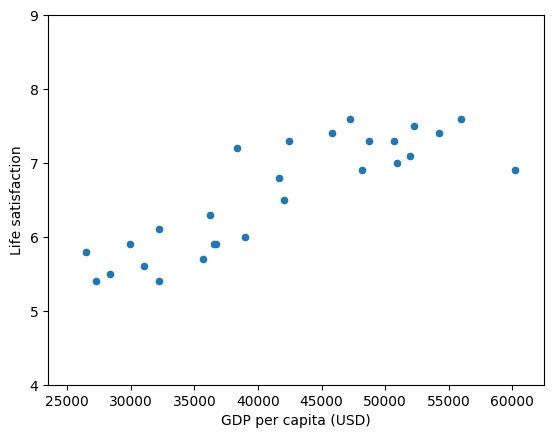

In [64]:
# visualizar los datos
lifesat.plot(kind="scatter", x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

Analiza los puntos que aparecen en la gráfica: a simple vista, todos parecen seguir un comportamiento *bastante lineal*. En general, a mayores ingresos, parece haber mayor satisfacción con la vida. Sin embargo, también aparecen puntos “raros” o *críticos*. Un buen ejemplo es Estados Unidos, que muestra una puntuación de satisfacción relativamente baja para su GDP per capita (USD), comparado con otros países con ingresos similares.

Y aquí viene lo importante: para este conjunto de datos no existe una recta que pase exactamente por todos los puntos. No hay magia. Los datos del mundo real casi nunca se alinean de forma perfecta.

Llegados a este punto, tienes dos opciones:

> Ajustar el modelo a mano, probando valores de $m$ y $b$ hasta que la recta “más o menos” se vea bien. ¿Se puede? Sí. ¿Es práctico? No. Y es muy aburrido.

> Usar un modelo de Regresión Lineal de verdad. Primero entenderemos las matemáticas que hay detrás, y luego usaremos el modelo de sklearn, que se basa en exactamente los mismos principios, pero nos ahorra el trabajo pesado y nos deja enfocarnos en lo importante: entender el modelo y sus resultados.

Usaremos la segunda opcion!

Cuando tienes muchos puntos, la recta que minimiza el error global se obtiene con el criterio de mínimos cuadrados.

Lo que se minimiza es:

$$
Error = \sum^{n}_{i=1}{(y_i - (mx_i + b))^2}
$$

Para entender esta expresión, primero recordemos la idea básica de un modelo lineal:

$$
y=mx+b
$$

Nada nuevo hasta aquí.
Lo único que cambia es que ahora no tenemos un solo punto, sino muchos.

<hr>

### ¿Qué significa ese símbolo raro $\sum$?

Si nunca habías visto el símbolo $\sum$ no te preocupes. Es literalmente una suma. Por ejemplo, si quieres sumar los números del 1 al 10, podrías escribir $1+2+3+...+8+9+10$, Pero eso es largo (imagina sumar del 1 al 1000).

Para eso existe el símbolo $\sum$:

$$
\sum_{i=1}^{10} i=1+2+3+...+8+9+10
$$

También podrías escribir cosas como:
$$
\sum_{i=1}^{10} 2i=2 \cdot 1+2 \cdot 2+2 \cdot 3+...+2 \cdot 8+2 \cdot 9+2 \cdot 10
$$

O incluso combinarlo con sumas normales. Mira este ejemplo y piénsalo con calma:

$$
6+7+8+9+10=\sum_{i=6}^{10} i
$$

Dedícale un momento a esto hasta que te haga *click* en el cerebro, porque lo vas a ver todo el tiempo en ML.

<hr>

### ¿Y qué pasa con $x_i$ y $y_i$?

En nuestro caso no aparece solo una $i$, aparecen $x_i$ y $y_i$

Pero la idea es exactamente la misma.

Esto simplemente significa que tenemos conjuntos de datos, por ejemplo:

$$
x=[5,6,8,9]
$$

$$
y=[1,2,3,4]
$$

Aqui $i$ ya no representa directamente un número, sino la posición dentro del conjunto:

> si $i=1$ entonces $x_i=5$

> si $i=2$ entonces $x_2=6$

> si $i=1$ entonces $y_i=1$

<hr>

### Volviendo al error

Fijate nuevamente en la ecuación.
La expresión:

$$
y_i - (mx_i+b)
$$

mide qué tan mal predice el modelo para cada punto.

En el ejemplo de Celsius a Fahrenheit, el error era cero, porque:

$$
y_i =mx_i+b
$$

Cuando eso pasa, la resta da cero, y al sumar todos esos ceros... sorpresa: el error total también es cero. Modelo perfecto.

<hr>

### ¿Y por qué elevamos el error al cuadrado?
Es una buena pregunta, y hay varias razones importantes:

* Los errores grandes se vuelven aún más grandes (se notan más).

* Evita que errores positivos y negativos se cancelen entre sí.

* Hace posible resolver el problema con trucos matemáticos muy útiles.

<hr>

### Solución exacta

Las explicaciones detalladas de cómo se minimiza la ecuación del error para obtener $m$ y $b$ no son cortas ni triviales. De hecho, para hacerlo con todo el rigor matemático habría que recorrer, como mínimo, un curso completo de cálculo: derivadas, optimización y un poco de álgebra lineal.

La idea central es simple de decir:

> Buscamos los valores de $m$ y $b$ que hacen mínimo ese error total.

Para lograrlo, se usan derivadas y se resuelve un problema de optimización. Si esos conceptos aún no están claros, no pasa nada, pero sí es necesario dominarlos para entender de verdad qué está pasando.

Así que te propongo lo siguiente:
pausa un momento la lectura y investiga lo suficiente hasta que puedas responder, con tus propias palabras, estas tres preguntas clave:

> ¿Qué es una derivada?

> ¿Qué significa el método de mínimos cuadrados?

> ¿Cómo se encuentra el mínimo de una función?

Cuando tengas esas ideas claras, intenta llegar a las soluciones:

$$
m=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum{(x_i-\bar{x})^2}}
$$

$$
b=\bar{y}-m\bar{x}
$$

Donde $\bar{x}$ es el promedio de los $x$, y $\bar{y}$ es el promedio de los $y$.

Llevemos todo esto a la práctica.

In [65]:
# calcular la pendiente (m) y la intersección (b)

# obtener valroes de x y de y
x_lifesat = lifesat[["GDP per capita (USD)"]].values
y_lifesat = lifesat[["Life satisfaction"]].values

# calcular promedio de x y de y
x_mean = sum(x_lifesat) / len(x_lifesat)
y_mean = sum(y_lifesat) / len(y_lifesat)

# empecemos calculando la pendiente (m)

# calcular numerador
numerator = sum((x_lifesat - x_mean) * (y_lifesat - y_mean))

# calcular denominador
denominator = sum((x_lifesat - x_mean) ** 2)

# calcular pendiente (m)
m = numerator / denominator

# calcular intersección (b)
b = y_mean - m * x_mean

print(f"m: {m}, b: {b}")

m: [6.77889969e-05], b: [3.74904943]


Para visualizar el modelo de forma clara, graficaremos la **recta resultante** junto con los **puntos originales**, de modo que podamos observar qué tan bien el modelo se ajusta a los datos.

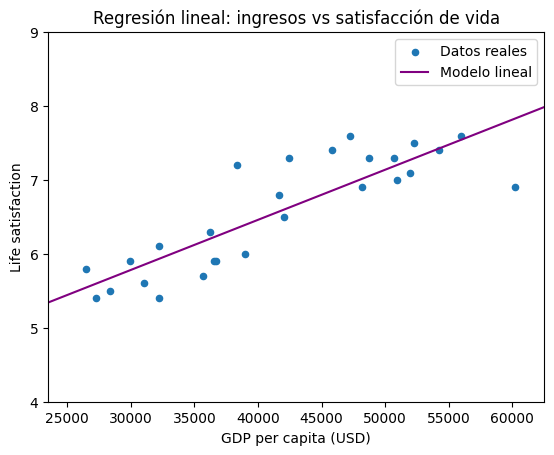

In [ ]:
lifesat.plot(
    kind="scatter",
    x="GDP per capita (USD)",
    y="Life satisfaction",
    label="Datos reales"
)

plt.axis([23_500, 62_500, 4, 9])

x = np.linspace(23_500, 62_500, 10)
y = m * x + b

plt.plot(x, y, color="purple", label="Modelo lineal")

# Añadir título
plt.title("Regresión lineal: ingresos vs satisfacción de vida")
plt.legend()

plt.show()

Como dijimos anteriormente, la parte matemática es **esencial**, pero por suerte existen **muchísimas herramientas** que nos facilitan este trabajo.

En este caso utilizaremos la clase *LinearRegression* de *sklearn*, que implementa exactamente los mismos principios matemáticos que acabamos de estudiar, pero nos ahorra todo el cálculo "manual" y nos permite enfocarnos en el análisis y la interpretación del modelo.

In [67]:
%%capture --no-display
%pip install pandas scikit-learn

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
# crear el modelo de regresión lineal
model = LinearRegression()

# entrenar el modelo
model.fit(x_lifesat, y_lifesat)

# obtener la pendiente (m) y la intersección (b)
m_sklearn = model.coef_[0][0]
b_sklearn = model.intercept_[0]

# comparemos los valores obtenidos a mano con los de sklearn
print(f"Pendiente (m) en sklearn:{m_sklearn}")
print(f"Intersección (b) en sklearn:{b_sklearn}")
print(f"Pendiente (m) a mano:{m}")
print(f"Intersección (b) a mano:{b}")

Pendiente (m) en sklearn:6.778899694341222e-05
Intersección (b) en sklearn:3.7490494273769093
Pendiente (m) a mano:[6.77889969e-05]
Intersección (b) a mano:[3.74904943]


Una vez creado el modelo, lo utilizaremos para **realizar predicciones** sobre la felicidad de las personas. Como ejemplo, usaremos el **GDP per capita de España**.

En los datos reales, España tiene una **satisfacción con la vida de 6.3 puntos**. En este caso, usaremos el modelo para **predecir** el nivel de satisfacción con la vida de España a partir de una única pista: su **GDP per capita (en dólares)**.

Es decir, le proporcionaremos al modelo el valor de entrada (el GDP per capita) y el modelo se encargará de **estimar** el nivel de satisfacción con la vida correspondiente.

In [70]:
# crear predicciones
x_new = [[36215.4]] # GDP de españa
print(model.predict(x_new))

[[6.20405507]]


Nuestra predicción está muy cercana a la realidad: el modelo estimó un valor aproximado de 6.2, mientras que el dato real es 6.3.

Esto indica que, a pesar de ser un modelo muy simple, la regresión lineal logró capturar una relación relevante entre el GDP per capita y la satisfacción con la vida. No es perfecto, y no tiene por qué serlo, pero para un primer modelo, el resultado es bastante sólido.

### Otro enfoque: aprender a partir de ejemplos cercanos

También existen modelos muy sencillos pero útiles para este tipo de ejemplos, conocidos como modelos de aprendizaje basado en instancias.

Este enfoque funciona de manera distinta a la regresión lineal. El modelo recibe un parámetro que llamaremos *k*. Dado un nuevo dato de entrada, el algoritmo busca los *k* puntos más cercanos dentro del conjunto de datos y utiliza sus valores de salida para realizar una predicción, generalmente promediándolos.

El número de puntos que se tienen en cuenta está determinado directamente por el parámetro *k*.

En sklearn ya existe una clase que implementa este método y nos ahorra todo el trabajo: *KNeighborsRegressor*, que corresponde al algoritmo de *k-nearest neighbors regression*.

Este modelo **no aprende una función explícita** como $y = mx + b$; simplemente **consulta los datos almacenados** cada vez que necesita hacer una predicción. Esa es la razón por la que se le llama *aprendizaje basado en instancias*.

In [71]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)

# entrenar el modelo
model.fit(x_lifesat, y_lifesat)

# crear predicciones
x_new = [[38341.307]] # GDP de españa
print(model.predict(x_new))

[[6.36666667]]


En resumen, primero analizamos los datos, luego seleccionamos un modelo, lo entrenamos con esos datos y, finalmente, lo utilizamos para hacer predicciones sobre nuevos casos, con la esperanza de que el modelo haya generalizado correctamente la información y no solo memorizado los ejemplos originales.

# Retos del Machine Learning

Para empezar, hay dos cosas **esenciales** para construir un buen modelo de *machine learning*:
**buenos datos** y **un buen modelo**. Si uno de los dos falla, el resultado también lo hará.

### Cantidad insuficiente de datos de entrenamiento

¿Recuerdas que antes hicimos la suposición de que los datos debían ser **100 % precisos** o, en su defecto, que debíamos contar con un **conjunto grande de mediciones**?

Las máquinas aprenden de una forma muy distinta a nosotros. Mientras que un ser humano puede reconocer patrones con apenas unos pocos ejemplos, los modelos de *machine learning* suelen necesitar **cientos, miles o incluso millones de datos** para aprender correctamente cosas que a nosotros nos parecen obvias.

Por ejemplo, ¿cuántas veces necesitarías ver un modelo de carro para reconocer que es distinto a otros? Con verlo un par de veces probablemente te bastaría, incluso si cambia de color. Para una máquina, en cambio, ese proceso requiere muchos más ejemplos.

Tener una gran cantidad de datos ayuda a que los **valores atípicos** (outliers) no afecten negativamente al modelo.

Piénsalo con este ejemplo: imagina que estás midiendo cuánto tiempo tarda en caer una pelota desde un segundo piso para estimar la altura desde la que fue lanzada. Es razonable pensar que **a mayor tiempo de caída, mayor altura**.

Realizas tres mediciones y obtienes los siguientes tiempos:

$$
[12\text{s},\ 12.2\text{s},\ 11.9\text{s}]
$$

Hasta aquí todo parece consistente. Sin embargo, hay un factor real que no puedes controlar completamente: el viento. En una cuarta medición ocurre un fuerte ventarrón que altera el resultado, y obtienes:

$$
14.4\text{s}
$$

Si calculamos el promedio rápidamente:

$$
\frac{12 + 12.2 + 11.9 + 14.4}{4} = 12.6
$$

Ese **14.4** es un valor atípico y está alterando de forma significativa el promedio. Una sola medición extraña ya logró mover bastante el resultado.

Supongamos que sigues realizando mediciones del tiempo de caída y ahora tienes muchos más datos, la mayoría coherentes con lo que ya habías observado:

$$
[12s, 12.2s, 11.9s, 12.1s, 12.0s, 11.8s, 12.3s, 12.1s, 12.0s, 12.2s]
$$

El promedio de estas 10 mediciones es aproximadamente:

$$
\frac{12s + 12.2s + 11.9s + 14.4​ + 12.1s + 12.0s + 11.8s + 12.3s + 12.1s + 12.0s + 12.2s}{11} \approx 12.27
$$

Antes, con pocos datos, el valor atípico empujó el promedio hasta 12.6.
Ahora, con muchos datos, apenas lo movió 12.27, el valor extraño sigue estando ahí, pero su efecto es mucho menor.

Cuando tienes pocos datos, un solo error puede distorsionar fuertemente el resultado.

Cuando tienes muchos datos, los valores atípicos pierden peso y el modelo aprende el comportamiento general, no las excepciones.

Esto es exactamente lo que buscamos en machine learning, que el modelo aprenda la tendencia real del fenómeno y no se deje engañar por el ruido.

### Non-representative Training Data

Es crucial que los datos de entrenamiento sean representativos de la información que queremos generalizar. Si los datos no representan bien la realidad completa, el modelo aprenderá una versión sesgada del problema.

Por ejemplo, el conjunto de datos que usamos para predecir la felicidad no era completamente representativo del total de países existentes. En nuestra muestra utilizamos pocos países, y dejamos por fuera muchos otros que pueden afectar significativamente la forma de la recta resultante.

Al entrenar el modelo solo con una parte limitada de la realidad, el modelo aprende una relación que solo es válida dentro de ese subconjunto de datos, pero que no necesariamente se mantiene cuando ampliamos el panorama.

Ahora hagamos un modelo lineal usando un conjunto de datos más amplio y observa qué ocurre. Notarás que el modelo lineal ya no tiene mucho sentido para estos nuevos datos: la relación entre el dinero y la felicidad se vuelve mucho más débil, e incluso puede parecer que ya no están claramente correlacionados.

Esto ilustra un problema fundamental en machine learning:
un modelo puede ser matemáticamente correcto y aun así ser conceptualmente incorrecto si los datos con los que fue entrenado no representan bien el fenómeno real que queremos modelar.

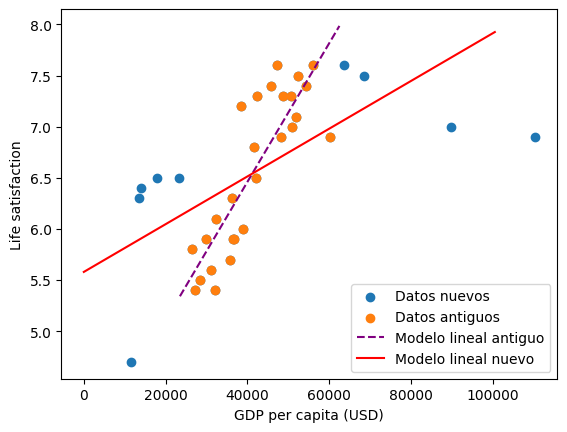

In [104]:
# Cargar datos completos
lifesat_full = pd.read_csv(
    os.path.join(data_root, "..", "data/lifesat/lifesat_full.csv")
)

# Graficar puntos
plt.scatter(lifesat_full["GDP per capita (USD)"],
            lifesat_full["Life satisfaction"],
            label="Datos nuevos")

plt.scatter(lifesat["GDP per capita (USD)"],
            lifesat["Life satisfaction"],
            label="Datos antiguos")

# Recta del modelo antiguo
plt.plot(x, y, "purple", linestyle="dashed", label="Modelo lineal antiguo")

# Entrenar y graficar modelo nuevo
model = LinearRegression().fit(
    lifesat_full[["GDP per capita (USD)"]],
    lifesat_full[["Life satisfaction"]]
)

x_full = np.linspace(0, 100_500, 100)
y_full = model.coef_[0][0] * x_full + model.intercept_[0]

plt.plot(x_full, y_full, "red", label="Modelo lineal nuevo")

plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.legend()
plt.show()

Como notarás, la nueva recta muestra una correlación mucho más débil entre el dinero y la felicidad. Esto deja algo muy claro: **es crucial usar datos representativos** de los casos que queremos predecir.

El problema es que esto no siempre es fácil. Cuando tenemos pocos datos, el riesgo es evidente, pero incluso con conjuntos grandes el modelo puede fallar si los datos están mal seleccionados. En ambos casos, el resultado es el mismo: el modelo aprende una visión distorsionada de la realidad.

A este problema lo llamamos **sesgo de muestreo** (sampling bias).

### Datos de mala calidad (Poor-Quality Data)

Si tus datos de entrenamiento contienen errores, valores atípicos o demasiado ruido, es totalmente esperable que el modelo no logre detectar patrones reales. En consecuencia, el sistema tendrá un rendimiento pobre o directamente fallará.

Un modelo no es más inteligente que sus datos. Puedes usar el mejor algoritmo del mundo, pero si los datos son "pobres", el resultado también lo será.

Para mitigar este problema, normalmente se realiza un proceso de limpieza de datos (data cleaning) antes de entrenar el modelo. De hecho, la mayor parte del tiempo de un científico de datos se invierte en esta etapa, no en entrenar modelos.

En general, puedes aplicar varias estrategias:

* **Eliminación de valores atípicos (outliers):**
Si algunas instancias contienen valores claramente anómalos y no representan el fenómeno real que deseas modelar, lo más seguro suele ser descartarlas, especialmente cuando hay suficientes datos.

* **Manejo de valores nulos (missing values):**
Si una instancia tiene información faltante en algunas características, puedes:

    * Eliminar la instancia completa (si son pocas).

    * Ignorar la característica afectada.

    * Rellenar los valores faltantes usando estrategias como promedios, medianas o valores estimados a partir de datos similares.

Elegir la estrategia correcta no es automático: depende del contexto, del dominio del problema y del impacto que esos datos tengan en el modelo.

### Características irrelevantes (Irrelevant Features)

Un sistema de machine learning solo puede aprender si los datos de entrenamiento contienen características relevantes y, igual de importante, no están saturados de características irrelevantes.

Las características irrelevantes actúan como ruido: confunden al modelo, aumentan la complejidad innecesariamente y pueden provocar **overfitting**, haciendo que el modelo funcione bien en entrenamiento pero mal en datos nuevos.

Por eso, una parte crítica en el desarrollo de cualquier modelo es elegir correctamente las características del conjunto de datos. A este proceso lo llamamos **feature engineering**, y suele incluir los siguientes pasos:

* **Selección de características (feature selection):**

Consiste en elegir las características más útiles y descartar aquellas que no aportan información relevante para el problema. Esto simplifica el modelo y mejora su capacidad de generalización.

* **Extracción de características (feature extraction):**

Implica combinar o transformar las características seleccionadas para crear representaciones más informativas. Esto puede reducir la dimensionalidad del problema y facilitar el aprendizaje del modelo.

* **Creación de nuevas características (feature creation):**

En algunos casos, se generan nuevas características recopilando datos adicionales o derivando información nueva a partir de los datos existentes, lo que puede mejorar significativamente el desempeño del modelo.

### Sobreajuste (Overfitting the Training Data)

Imagina que estás caminando por una ciudad que no conoces y, de repente, ves una rata cruzando la calle. Automáticamente tu cerebro concluye algo como: “esta ciudad es muy sucia, está llena de ratas”.

A pesar de haber visto una sola rata, generalizaste esa observación a toda la ciudad. A los humanos nos pasa constantemente: sacamos conclusiones fuertes a partir de muy pocos datos.

A las máquinas les ocurre algo muy parecido. La diferencia es que, en machine learning, a este fenómeno lo **llamamos overfitting**.

El overfitting ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, incluyendo detalles irrelevantes y ruido, pero falla al intentar generalizar ese conocimiento a datos nuevos. El modelo “cree” que ha entendido el patrón general, cuando en realidad solo memorizó casos específicos.

En otras palabras, tu modelo te está diciendo que hay ratas por toda la ciudad...
cuando en realidad solo ha visto una.


Modificar el modelo para hacerlo más simple y reducir el riesgo de overfitting se llama **regularización** (regularization).

La idea es castigar la complejidad innecesaria del modelo. Si el modelo tiene demasiados parámetros o pesos muy grandes, puede ajustarse demasiado a los datos de entrenamiento y perder capacidad de generalización. La regularización introduce una penalización que empuja al modelo a soluciones más simples.

Supongamos una regresión lineal que intenta ajustar puntos ruidosos. Sin regularización, el modelo puede asignar coeficientes muy grandes para pasar “perfectamente” por casi todos los puntos, aprendiendo también el ruido.
Con regularización (por ejemplo, L2), se añade un término que penaliza coeficientes grandes. Como resultado, el modelo prefiere una recta más suave, que no ajusta cada punto al milímetro, pero generaliza mejor a datos nuevos.

### Subajuste de los datos de entrenamiento (Underfitting)

El **underfitting** es lo contrario al **overfitting**: ocurre cuando el modelo es demasiado simple y no logra aprender la estructura subyacente de los datos. Como resultado, el modelo presenta un error alto tanto en los datos de entrenamiento como en los de prueba.

Esto suele pasar cuando el modelo tiene muy **pocos parámetros**, cuando las características no son representativas, o cuando existen demasiadas restricciones que limitan su capacidad de aprendizaje.

Para reducir el underfitting, se pueden tomar varias acciones:

* Usar un modelo más potente, con mayor capacidad y más parámetros.

* Proporcionar mejores características (feature engineering) al algoritmo de aprendizaje.

* Reducir las restricciones del modelo, por ejemplo, disminuyendo la regularización.

* Entrenar el modelo durante más tiempo (si aplica).

En esencia, el underfitting indica que el modelo ni siquiera ha aprendido lo básico del problema.


# Pruebas y Validación

La única forma de saber si un modelo **generaliza bien** a nuevos casos es **evaluarlo con datos que no ha visto durante el entrenamiento**.

Para ello, se suele dividir el conjunto de datos en dos partes:
un **conjunto de entrenamiento**, utilizado para ajustar el modelo, y un **conjunto de prueba**, empleado exclusivamente para evaluarlo.

El error calculado sobre el conjunto de prueba se denomina **error de generalización** (*generalization error*) o **error fuera de la muestra** (*out-of-sample error*).

Este valor indica qué tan bien se comporta el modelo frente a **nuevas instancias desconocidas**, y es una medida clave de su capacidad real de predicción.


### Ejercicios

1. ¿Qué significa exactamente que un modelo generalice bien?

2. ¿Por qué evaluar un modelo solo con los datos de entrenamiento es una mala idea?

3. ¿Qué es el generalization error (o out-of-sample error) y cómo se obtiene?

4. ¿Qué diferencia conceptual hay entre error de entrenamiento y error de generalización?

5. ¿Por qué dividir los datos en conjuntos de entrenamiento y prueba ayuda a detectar overfitting?

6. ¿Qué es el overfitting y por qué ocurre con más facilidad cuando hay pocos datos?

7. En el ejemplo de la ciudad y la rata, ¿qué error de razonamiento se está cometiendo?

8. ¿Por qué los humanos (y los modelos) tienden a sacar conclusiones fuertes a partir de pocos datos?

9. ¿Qué se entiende por datos representativos?

10. ¿Por qué un conjunto de datos puede ser grande y aun así no ser representativo?

11. ¿Qué es el sesgo de muestreo y cómo afecta a las predicciones de un modelo?

12. ¿Cómo se relaciona el sesgo de muestreo con una correlación engañosa?

13. ¿Por qué una correlación débil puede ser síntoma de un problema en los datos y no del modelo?

14. ¿Qué riesgos aparecen cuando entrenamos un modelo con datos que no se parecen a los casos reales?

15. ¿Por qué aumentar la complejidad del modelo no siempre mejora su desempeño real?

16. ¿Cómo puede un modelo “aprenderse” los datos sin aprender el fenómeno real?

17. ¿Qué señales prácticas nos indican que un modelo está sobreajustando?

18. ¿Por qué la validación con nuevos datos es la única forma honesta de evaluar un modelo?

19. ¿Cómo se conectan overfitting y sesgo de muestreo en un escenario real?

20. Si tuvieras que explicar en una frase por qué los datos importan más que el modelo, ¿qué dirías?